#### For Question 2 of Assignment 3, I'll be using a small version of the CIFAR dataset that contains images of 10 differerent classes, namely airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.

Question 1 : Apply PCA to the images and how many components is needed to preserve 95% of the variance?


In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

In [2]:
#load dataset from cifar with keras library and load the dataset and store in keras directory
pic_class = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = pic_class.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
#print the shape of training, testing
print('Training Data Shape: ', x_train.shape)
print('Testing Data Shape: ', x_test.shape)

print('Label Training Data Shape: ', y_train.shape)
print('Label Testing Data Shape: ', y_test.shape)

Training Data Shape:  (50000, 32, 32, 3)
Testing Data Shape:  (10000, 32, 32, 3)
Label Training Data Shape:  (50000, 1)
Label Testing Data Shape:  (10000, 1)


The dataset contains 50,000 images of colour, with shape 32X32 in train, and 10,000 images in test.

Im gonna sample 10,000 training images and 2000 testing images from the original dataset so that i can run my computations faster, and make the data smaller to fit in my RAM.

In [4]:
x_train,x_test = x_train[:10000],x_test[:2000]
y_train, y_test = y_train[:10000], y_test[:2000]

In [5]:
#lets reshape and scale our data
x_train_reshaped = x_train.reshape(x_train.shape[0],-1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_reshaped)
x_test_scaled = sc.transform(x_test_reshaped)

Question 1:

[PCA (2) Number of Component required to preserve 95 % variance (1)]

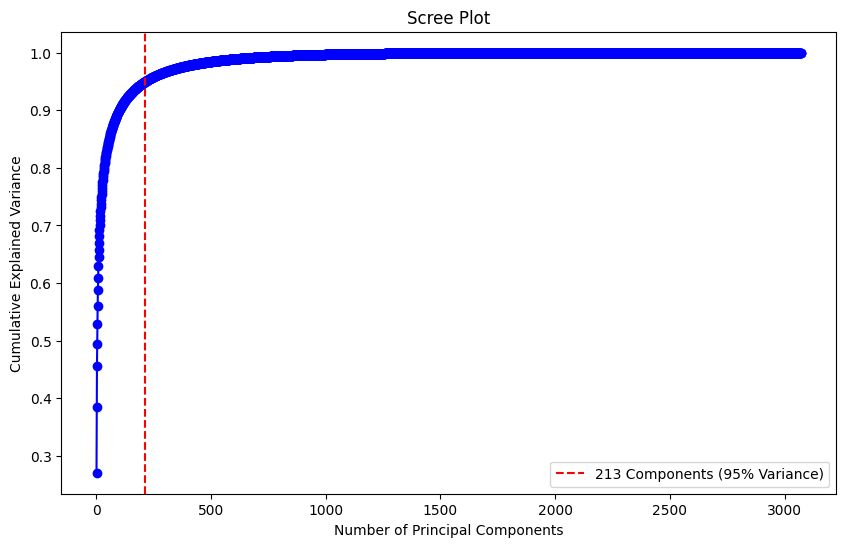




Number of components to preserve 95% variance: 213


In [6]:
# Apply PCA without specifying the number of components
pca = PCA()
pca.fit(x_train_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components to preserve 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axvline(x=n_components_95, color='r', linestyle='--', label=f'{n_components_95} Components (95% Variance)')
plt.legend()
plt.show()

print("\n\n")
print(f"Number of components to preserve 95% variance: {n_components_95}")

#### Question 2:
[10 images in original from (1.5) Their reconstruction (1.5)]

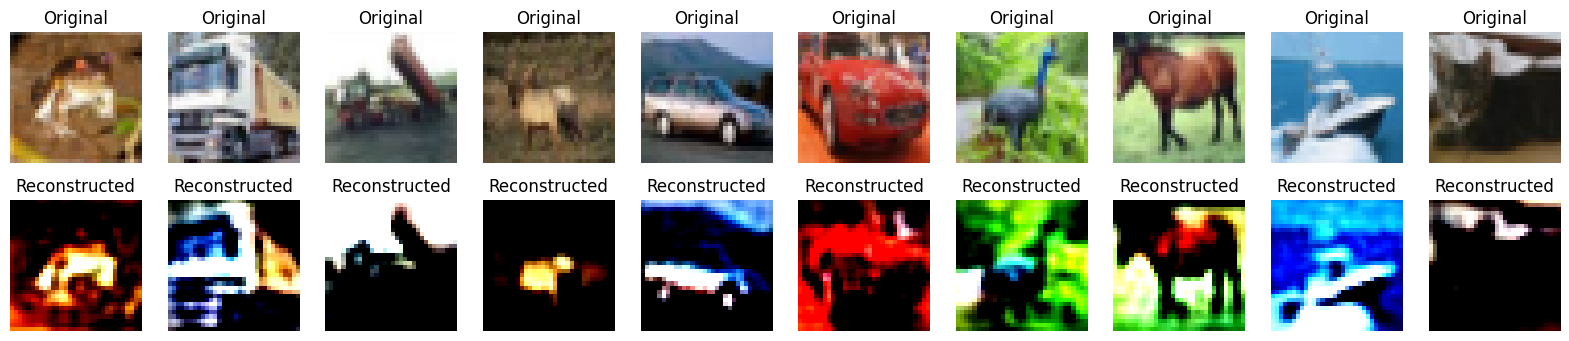

In [ ]:
# Apply PCA with 213 components
import matplotlib.cbook
# Suppress Matplotlib warnings
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)
n_components = 213
pca = PCA(n_components=n_components)
images_pca = pca.fit_transform(x_train_scaled)

# Reconstruct the images from the PCA components
images_reconstructed = pca.inverse_transform(images_pca)
images_reconstructed = images_reconstructed.reshape(10000, 32,32,3)

# Display 10 original and reconstructed images
num_displayed = 10
fig, axes = plt.subplots(2, num_displayed, figsize=(2 * num_displayed, 4))

for i in range(num_displayed):
    axes[0, i].imshow(x_train[i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    axes[1, i].imshow(images_reconstructed[i], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title('Reconstructed')

plt.show()


#### Question 3A :

[PCA with 2 dimensions (1) Amount of Variance preserved with these 2 components (1)]

In [7]:
# Apply PCA with 2 components
n_components = 2
pca = PCA(n_components=n_components)
images_pca = pca.fit_transform(x_train_scaled)

# Print the cumulative explained variance
cumulative_variance_explained = np.sum(pca.explained_variance_ratio_)
print(f"Variance explained by the first two principal components: {cumulative_variance_explained * 100:.2f}%")

Variance explained by the first two principal components: 38.49%


In [84]:
images_pca.shape

(10000, 2)

#### Question 3B:

Scatter plots of components with some images.

A: PCA


In [ ]:
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from skimage.transform import resize

#helper function to draw the plot

def plot_digits(X, y, min_distance=0.02, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = X #sc.fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    df = pd.DataFrame(X_normalized, columns=['PC1', 'PC2'])
    df['Category'] = y[:5000]
    for category in digits:
      subset = df[df['Category'] == category]
      plt.scatter(subset['PC1'], subset['PC2'], c=[cmap(float(category) / 9)], label=category, alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
              try:
                image = resize(images[index],(32,32))
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)
              except IndexError:
                continue

     # Add labels and title
    plt.xlabel('Principal Component 1 (PC1)')
    plt.ylabel('Principal Component 2 (PC2)')
    plt.title('Scatter Plot with Categories')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()




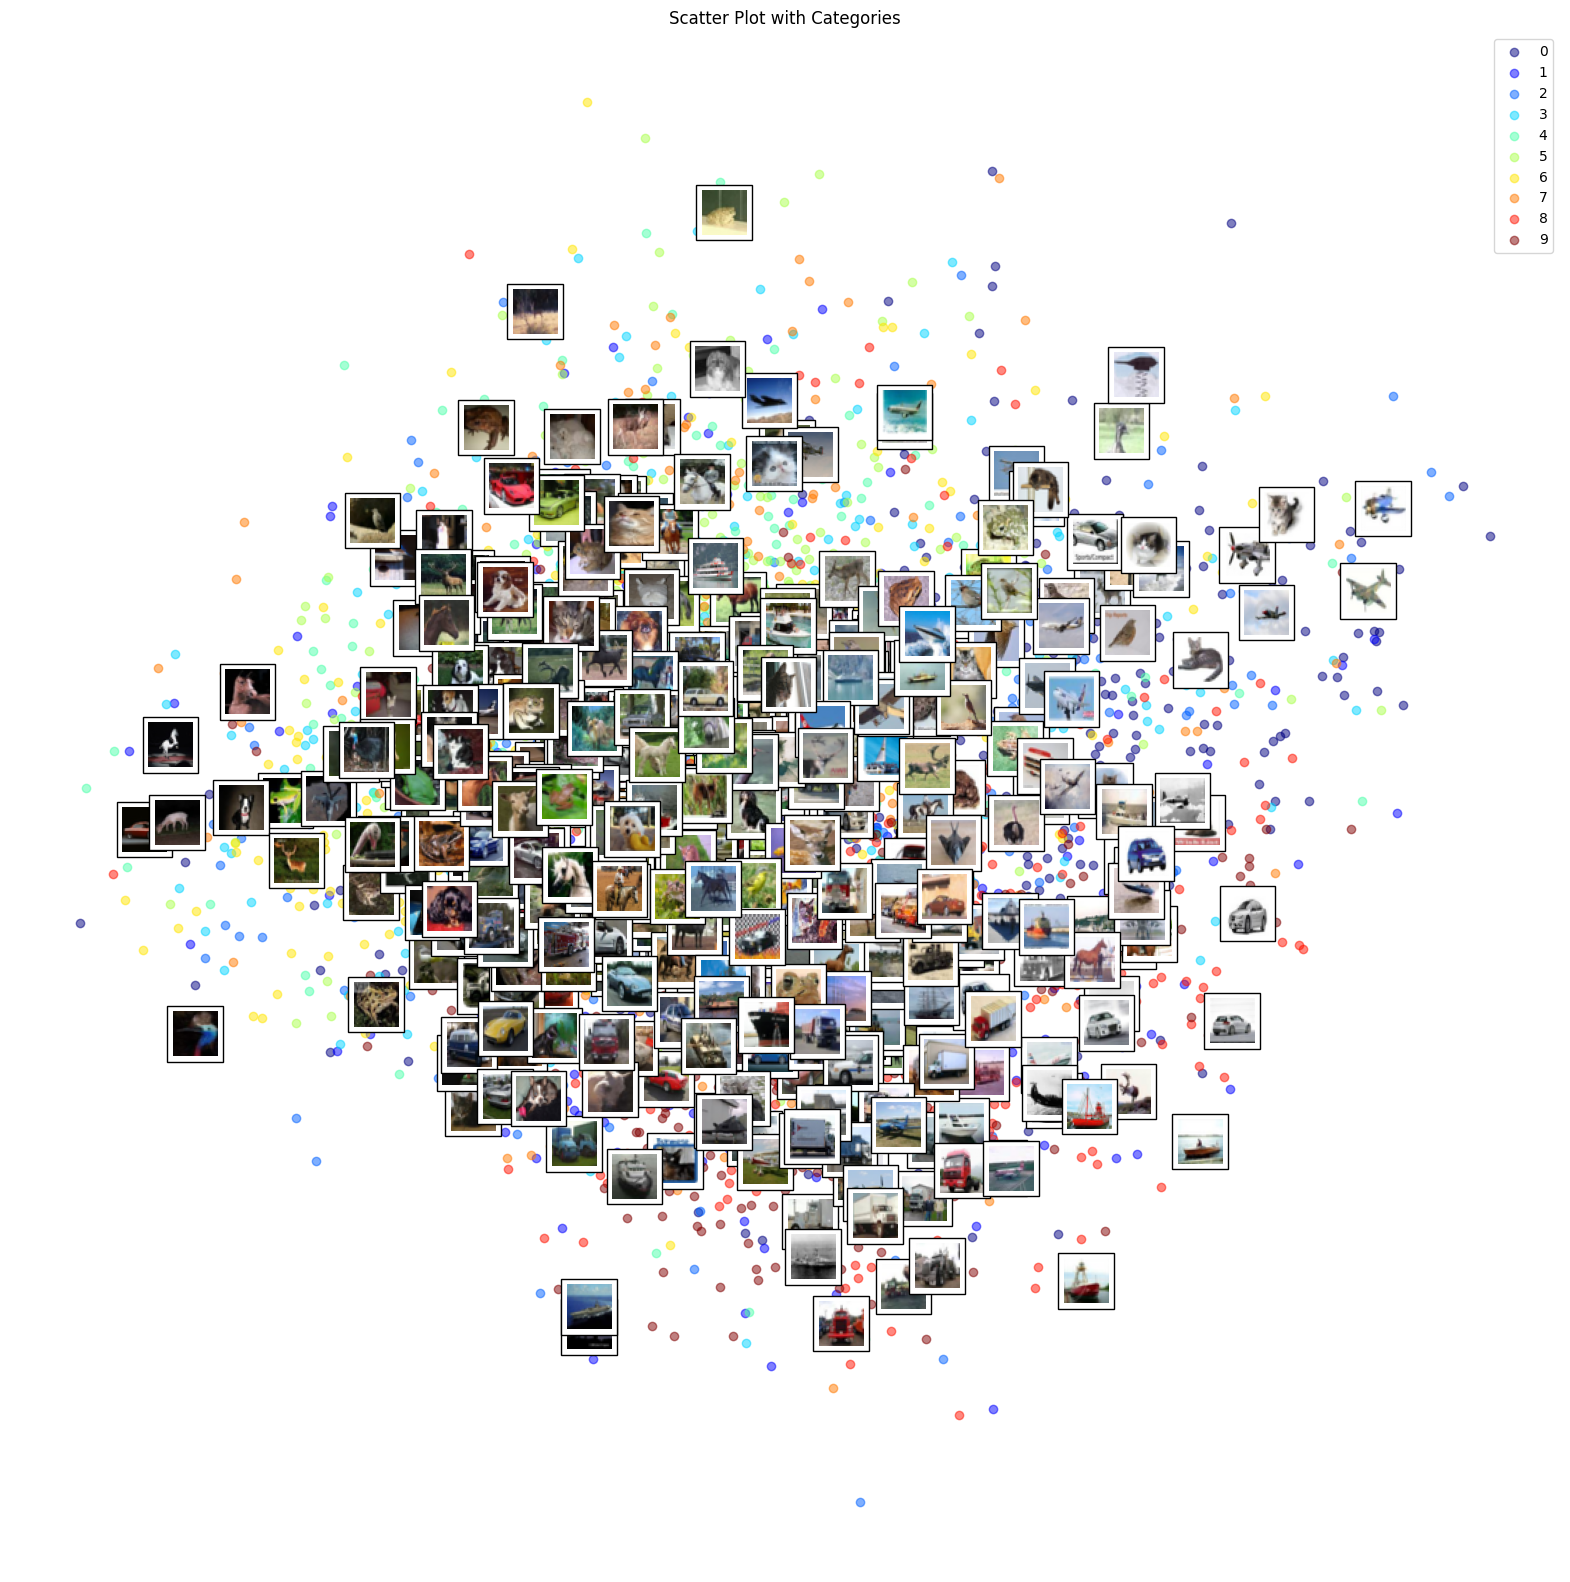

In [ ]:
#i'm gonna use 5000 rows to draw the plot with 500 imaages on top of it.
plot_digits(images_pca[:5000], y_train[:5000], images=x_train[:500], figsize=(20, 20))

#### Question 3B:

B: TSNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_reduced_tsne = tsne.fit_transform(x_train_scaled)
plot_digits(X_reduced_tsne[:5000], y_train[:5000], images=x_train[:500], figsize=(20, 20))
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### Question 3B:

C: LLE

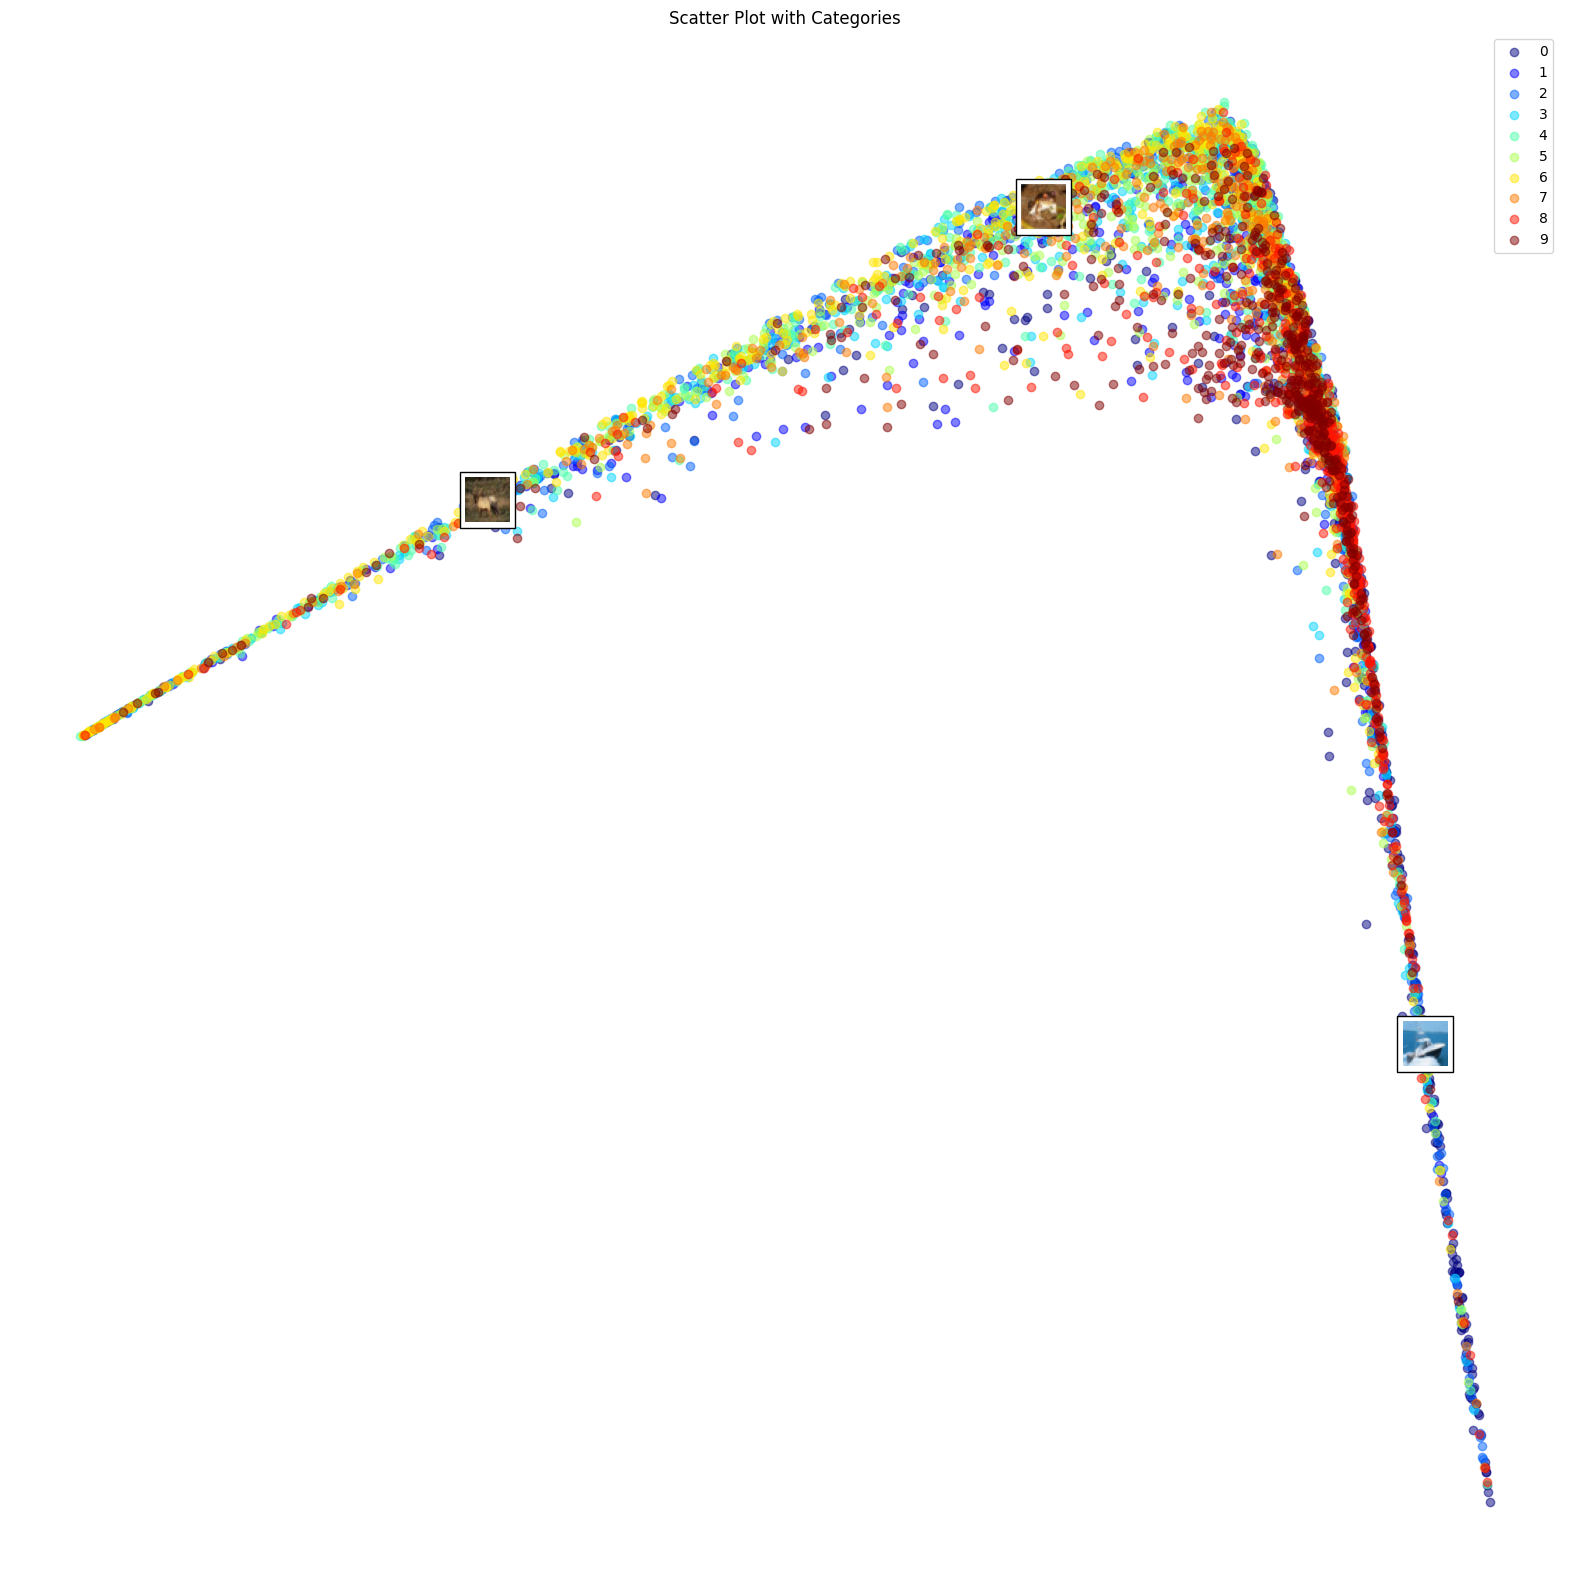

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2)
X_lle_reduced = lle.fit_transform(x_train_scaled[:5000])
plot_digits(X_lle_reduced[:5000], y_train[:5000], images=x_train[:500], figsize=(20, 20))

#### Question 3B:

D: MDS

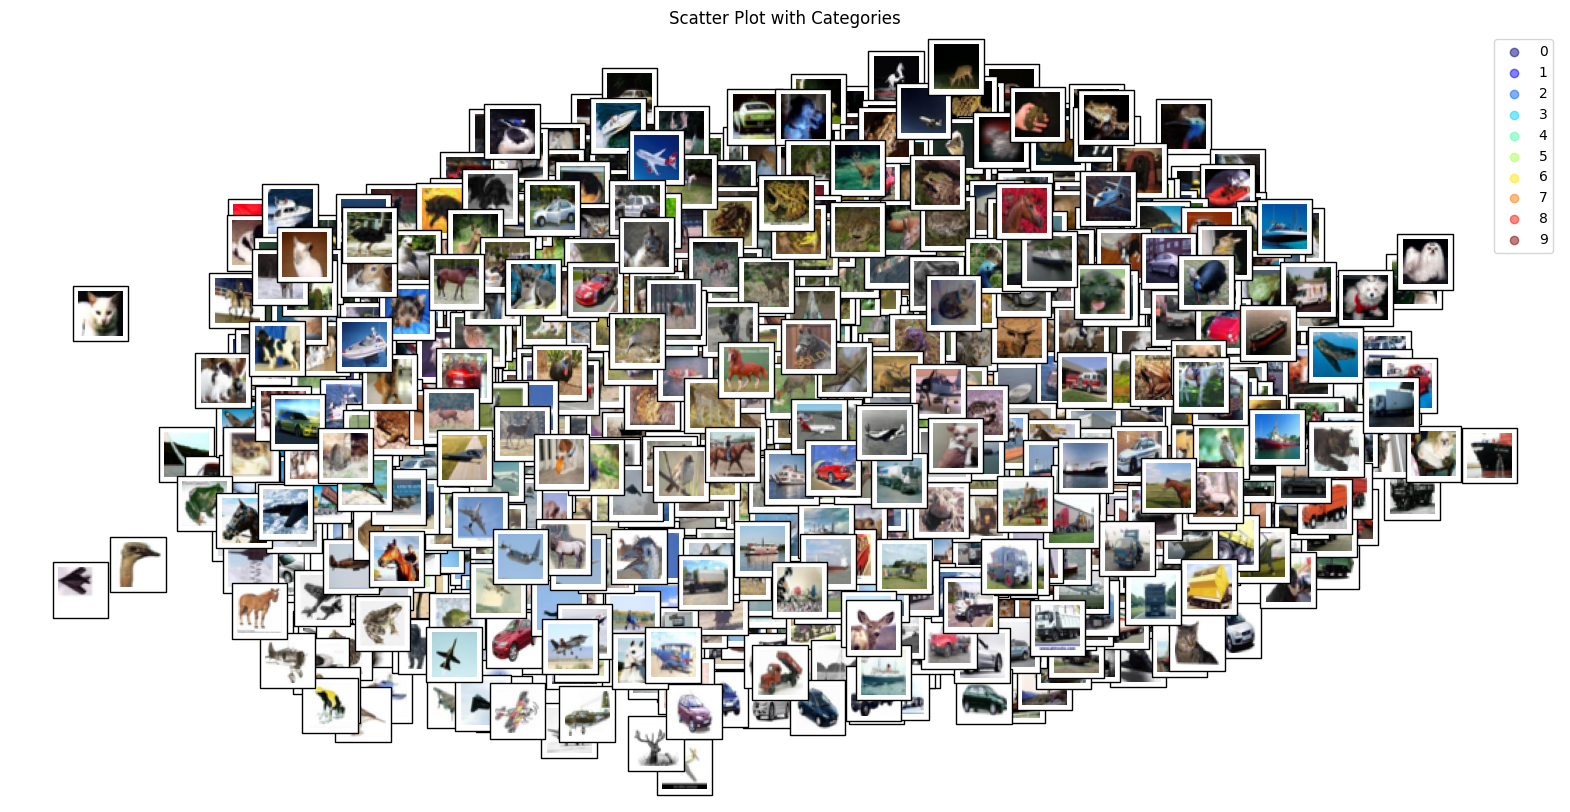

In [ ]:
from sklearn.manifold import MDS
X_mds_reduced = MDS(n_components=2,normalized_stress=False).fit_transform(x_train_scaled[:1500])
plot_digits(X_mds_reduced[:1500], y_train[:1500], images=x_train[:1500], figsize=(20, 10))
plt.show()

Question 3 C:
Discussion on the visualizations (preferred or not) (1)

Honestly, All the plots do have overlaps and there are no distinct clusters, but if you can observe closely, t-sne makes much better compression compared to other techniques. With only two components, and a variance of about 35%, I can still see some of the clusters formed. For instance, on the right hadn side, i can see a bunch of aeroplanes, and in the middle i can see horses grouped together.

Question 5:
Cluster images using K-Means.
To speed up the algorithm, use PCA to reduce the dimensionality of the dataset to two. Determine the number of clusters using one of the techniques we discussed in class. [4 points]

In [12]:
# Apply PCA with 2 components
n_components = 2
pca = PCA(n_components=n_components)
images_pca = pca.fit_transform(x_train_scaled)

In [10]:
images_pca.shape

(10000, 2)

Find the number of clusters using Elbow method:

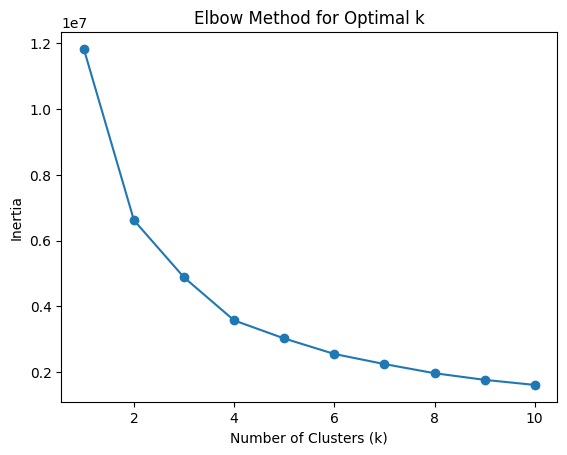

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try different values of k
k_values = range(1, 11)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(images_pca)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Looking at the above graph, there is no clear cut drop or elbow point. the decrease in inertial is smooth, so we can either go ahead with other techniques such as silhoutte or assume the number of clusters to be 10 as we know the number of classes in the dataset.

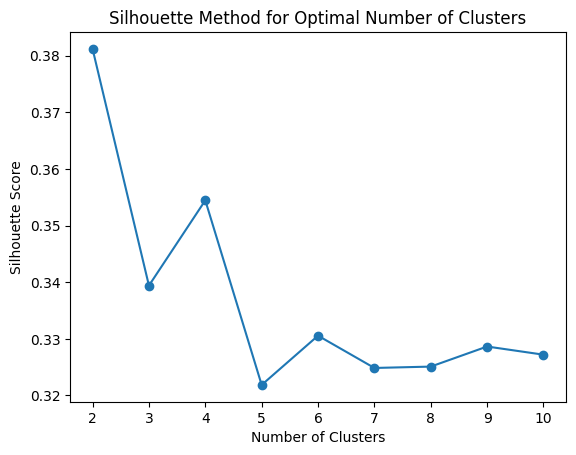

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate example data
np.random.seed(42)
X = images_pca

# Define the range of clusters to consider
min_clusters = 2
max_clusters = 10

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate over the range of clusters
for n_clusters in range(min_clusters, max_clusters + 1):
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Here, 2 number of clusters maximize the silhoutte score. Perhaps, we need more data and more number of pca componenets to have same number of clusters as the datasets.

In [17]:
optimal_k = 10 # the optimal number of clusters from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(images_pca)

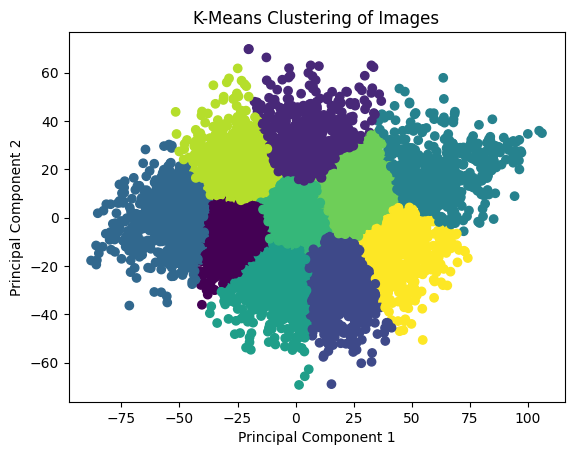

In [18]:
plt.scatter(images_pca[:, 0], images_pca[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering of Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Q 5b) Visualize the clusters in a similar way to the visualization in the ipynb file with points of each cluster uniquely labelled

Question 7:

Build a feedforward neural network (using dense and/or CNN layers).


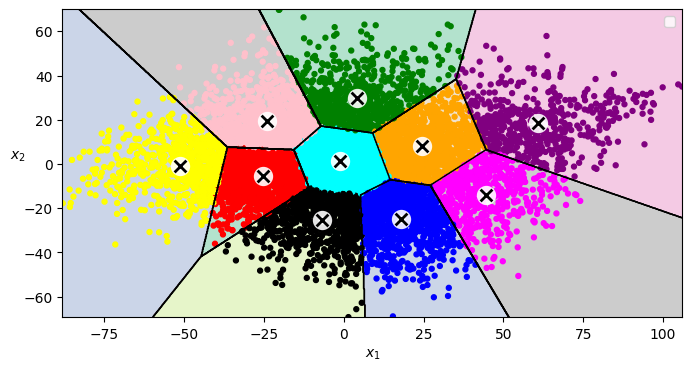

In [23]:
def plot_data(X, labels):
    # Create a color map for cluster labels
    color_map = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow', 4: 'purple', 5: 'black',6:"cyan",7:"orange",8:"pink",9:'magenta'}  # Add more colors if needed

    # Map cluster labels to colors
    colors = [color_map[label] for label in labels]

    # Plot data points with colors
    plt.scatter(X[:, 0], X[:, 1], c=colors, marker='.', s=50)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, labels, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X, labels)  # Pass cluster labels to plot_data
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.legend()

# Assuming y_pred contains the cluster labels
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(images_pca)
labels = kmeans.labels_

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, images_pca, y_pred)
plt.show()


Question 6:


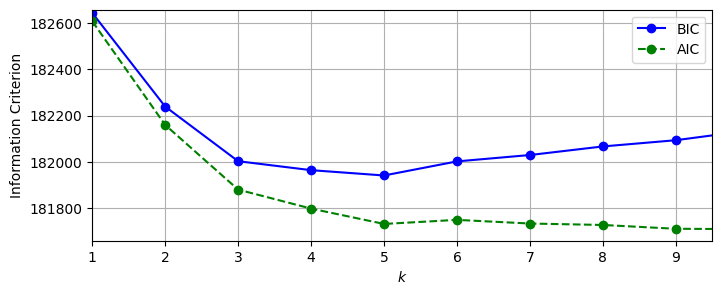

In [26]:
from sklearn.mixture import GaussianMixture

gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(images_pca)
             for k in range(1, 11)]
bics = [model.bic(images_pca) for model in gms_per_k]
aics = [model.aic(images_pca) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.legend()
plt.grid()
plt.show()

In [27]:
gm = GaussianMixture(n_components=10, n_init=10, random_state=42)
y_pred=gm.fit(images_pca)
gm.weights_

array([0.09846832, 0.16045061, 0.08443409, 0.08420272, 0.05530749,
       0.1074569 , 0.14087111, 0.07598704, 0.07413176, 0.11868996])

In [28]:
gm.means_

array([[ 24.58683216,   8.55154933],
       [ -2.68870336,   5.32489471],
       [-45.53113471,  -0.84501149],
       [  5.91808614, -31.07025038],
       [ 57.96311725,  15.29084422],
       [-23.71870159,  13.88146932],
       [-22.15265462,  -6.35528041],
       [ 36.25761826, -17.08636126],
       [  1.8244913 ,  29.19540484],
       [  7.83294222, -11.09562216]])

In [30]:
#did the algorithm converge
gm.converged_

True

In [31]:
#number of iterations it took
gm.n_iter_

9

In [33]:
#prediction of pribabilites
gm.predict_proba(images_pca).round(3)

array([[0.   , 0.079, 0.07 , ..., 0.   , 0.048, 0.   ],
       [0.053, 0.413, 0.001, ..., 0.003, 0.007, 0.458],
       [0.   , 0.   , 0.   , ..., 0.151, 0.   , 0.001],
       ...,
       [0.   , 0.   , 0.001, ..., 0.006, 0.   , 0.027],
       [0.075, 0.775, 0.001, ..., 0.   , 0.034, 0.076],
       [0.018, 0.301, 0.002, ..., 0.   , 0.46 , 0.   ]])

In [36]:
#cluster predictions
gm.predict(images_pca)

array([5, 9, 3, ..., 3, 1, 8])

### 6B)Visualize the clusters

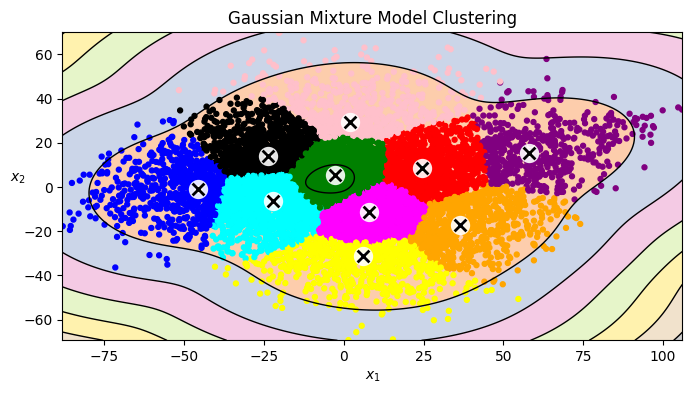

In [40]:
from sklearn.mixture import GaussianMixture

def plot_data_gm(X, labels):
    # Create a color map for cluster labels
    color_map = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow', 4: 'purple', 5: 'black',6:"cyan",7:"orange",8:"pink",9:'magenta'}  # Add more colors if needed

    # Map cluster labels to colors
    colors = [color_map[label] for label in labels]

    # Plot data points with colors
    plt.scatter(X[:, 0], X[:, 1], c=colors, marker='.', s=50)

def plot_centroids_gm(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries_gm(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap="Pastel2")
    plt.contour(xx, yy, Z, linewidths=1, colors='k')
    plot_data(X, clusterer.predict(X))  # Pass cluster labels to plot_data
    if show_centroids:
        plot_centroids_gm(clusterer.means_, weights=clusterer.weights_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

# Assuming y_pred contains the cluster labels


gm = GaussianMixture(n_components=10, n_init=10, random_state=42)
y_pred_gm = gm.fit_predict(images_pca)

plt.figure(figsize=(8, 4))
plot_decision_boundaries_gm(gm, images_pca)
plt.title("Gaussian Mixture Model Clustering")
plt.show()


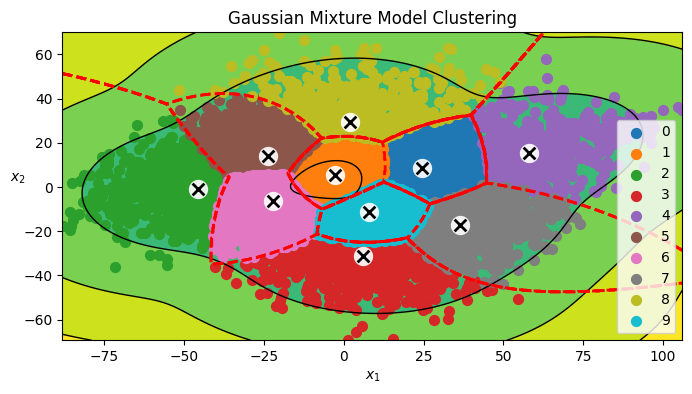

In [41]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, categories, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    # Map cluster labels to categories ('I', 'M', 'S')
    categories_map = {0: '0', 1: '1', 2: '2',3:"3",4:"4",5:"5",6:"6",7:"7",8:"8",9:"9"}

    # Plot data points with labels
    for label in np.unique(categories):
        X_label = X[categories == label]
        plt.scatter(X_label[:, 0], X_label[:, 1], label=categories_map[label], s=50)

    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

    # Show legend
    plt.legend()

# Assuming y_pred_gm contains the cluster labels
gm = GaussianMixture(n_components=10, n_init=10, random_state=42)
y_pred_gm = gm.fit_predict(images_pca)

plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, images_pca, y_pred_gm)
plt.title("Gaussian Mixture Model Clustering")
plt.show()

Question 6 C): Use the model to generate 20 new rocks

with two PCA components:

In [53]:
# Apply PCA with 2 components
n_components = 2
pca = PCA(n_components=n_components)
images_pca = pca.fit_transform(x_train_scaled)


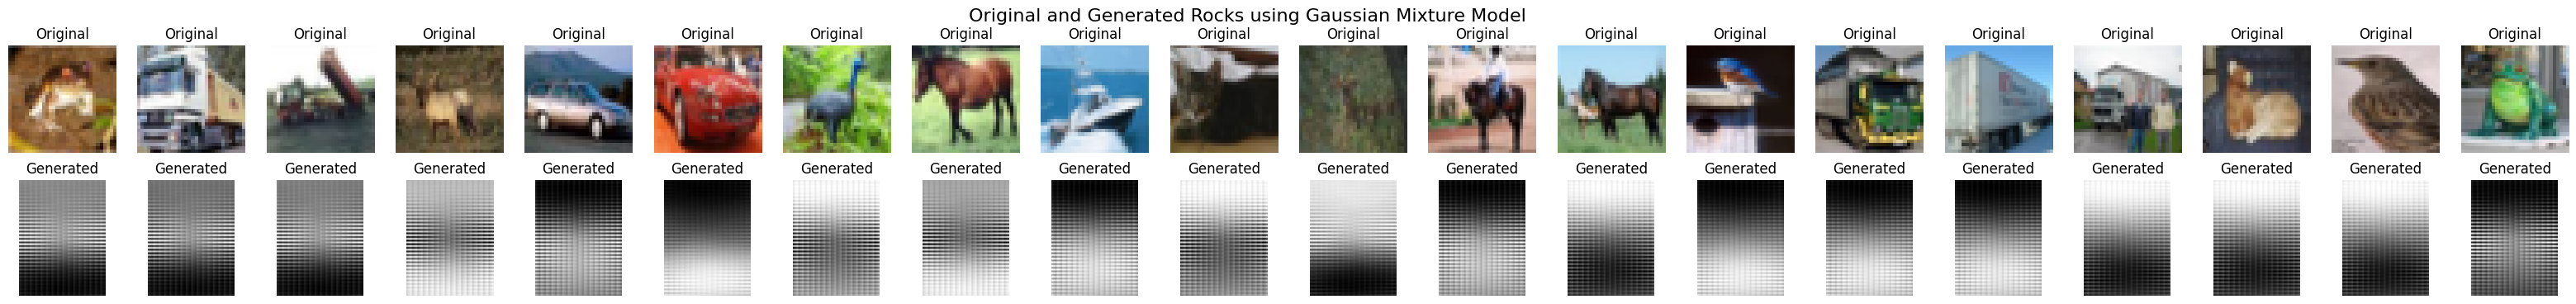

In [54]:
gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(images_pca)
n_gen_rocks = 20
gen_rocks_reduced, y_gen_rocks = gm.sample(n_samples=n_gen_rocks)
gen_rocks = pca.inverse_transform(gen_rocks_reduced)
gen_rocks = gen_rocks.reshape(20,64,48)


fig, axes = plt.subplots(2, n_gen_rocks, figsize=(2 * n_gen_rocks, 4))

for i in range(n_gen_rocks):
    # Plot Original Rocks
    axes[0, i].imshow(x_train[i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    # Plot Generated Rocks
    axes[1, i].imshow(gen_rocks[i], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title('Generated')

plt.suptitle('Original and Generated Rocks using Gaussian Mixture Model', fontsize=16)
plt.show()

In [ ]:
# Apply PCA with 200 components
n_components = 200
pca = PCA(n_components=n_components)
images_pca = pca.fit_transform(x_train_scaled)

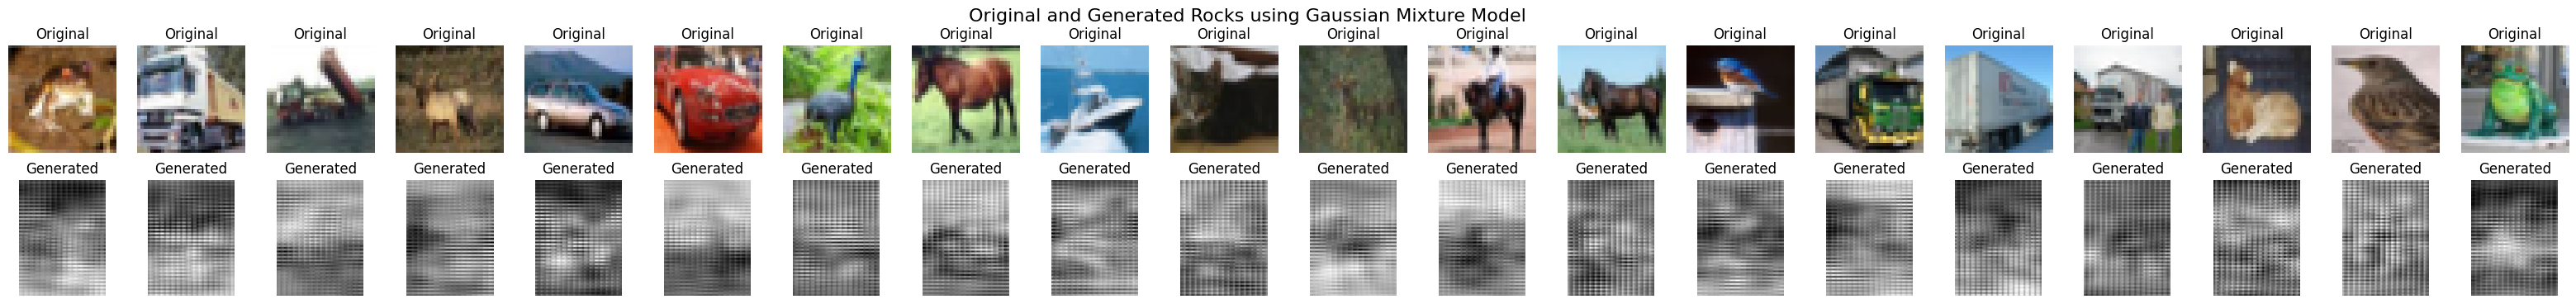

In [52]:

from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(images_pca)
n_gen_rocks = 20
gen_rocks_reduced, y_gen_rocks = gm.sample(n_samples=n_gen_rocks)
gen_rocks = pca.inverse_transform(gen_rocks_reduced)
gen_rocks = gen_rocks.reshape(20,64,48)


fig, axes = plt.subplots(2, n_gen_rocks, figsize=(2 * n_gen_rocks, 4))

for i in range(n_gen_rocks):
    # Plot Original Rocks
    axes[0, i].imshow(x_train[i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    # Plot Generated Rocks
    axes[1, i].imshow(gen_rocks[i], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title('Generated')

plt.suptitle('Original and Generated Rocks using Gaussian Mixture Model', fontsize=16)
plt.show()

Definitely, the reconstructiion of image is better when we have more number of pca componenets.

Question 7 :

Feedforward neural network (using dense and/or CNN layers) with a few hidden layers

In [55]:
#lets define our model and image parameters
img_width, img_height = 32,32  # Adjust based on your image size
batch_size = 10

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()

number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_29 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_30 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16,

Question 7c:

Total parameters :2397226

Bias parameters : 896

In [79]:
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Question 7.
A: Training Time has been Reported [ mentioned after training]

In [80]:
import time
epochs= 50
start = time.time()

print("Model training has begun at:  ",start)
history = r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=50)

print("Total training time of the model is: ", time.time() - start, "seconds")

Model training has begun at:   1700278004.184723
Epoch 1/50
313/313 [==============================] - 7s 9ms/step - loss: 1.8891 - accuracy: 0.3845 - val_loss: 1.6214 - val_accuracy: 0.4310
Epoch 2/50
313/313 [==============================] - 3s 10ms/step - loss: 1.3208 - accuracy: 0.5272 - val_loss: 1.5281 - val_accuracy: 0.4750
Epoch 3/50
313/313 [==============================] - 3s 8ms/step - loss: 1.0918 - accuracy: 0.6186 - val_loss: 1.2742 - val_accuracy: 0.5520
Epoch 4/50
313/313 [==============================] - 2s 8ms/step - loss: 0.9201 - accuracy: 0.6756 - val_loss: 1.1614 - val_accuracy: 0.6000
Epoch 5/50
313/313 [==============================] - 2s 8ms/step - loss: 0.7464 - accuracy: 0.7398 - val_loss: 1.0663 - val_accuracy: 0.6470
Epoch 6/50
313/313 [==============================] - 2s 8ms/step - loss: 0.6512 - accuracy: 0.7711 - val_loss: 1.2996 - val_accuracy: 0.5835
Epoch 7/50
313/313 [==============================] - 3s 10ms/step - loss: 0.5251 - accuracy: 0.81

Total training time of the model is:  143.82963132858276 seconds

Question 7 B: Plot training and validation loss and accuracy as a function of training epochs. [13 points]

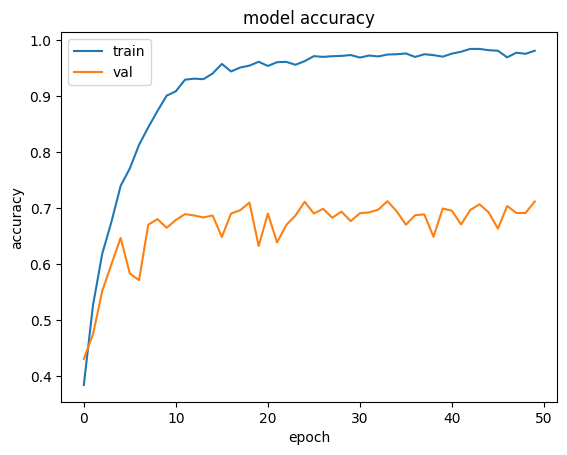

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

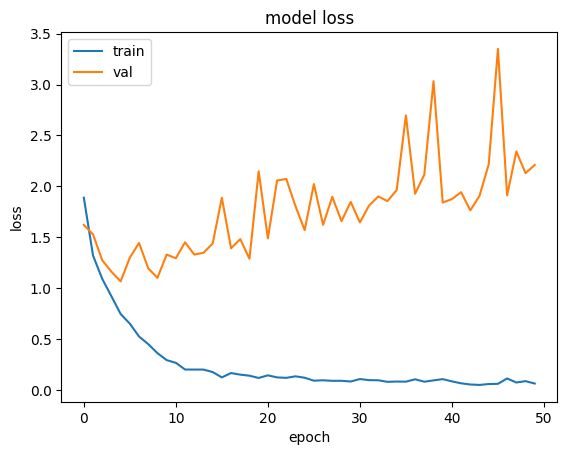

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 441ms/step
Original label is cat and predicted label is cat


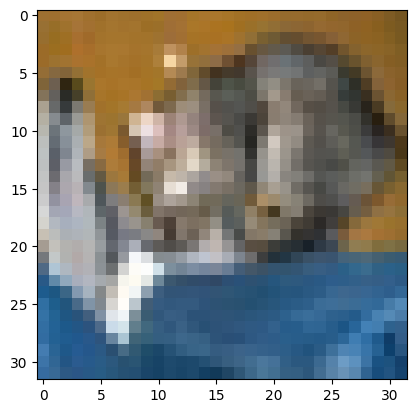

In [83]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 0

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))